In [1]:
import gensim
from gensim import corpora

from pythainlp.tokenize import word_tokenize

import seaborn as sns

import pandas
import numpy

import math
import re

In [2]:
def clean(doc):
    while True:
        new_doc = re.sub('[^\u0E00-\u0E7F]+', '', doc)
        if doc == new_doc:
            break
        else:
            doc = new_doc

    return doc

def remove_stop_words (corpus, dictionary, threshold):
    TfidfModel = gensim.models.TfidfModel
    tfidf = TfidfModel(corpus, dictionary)

    stop_words = []
    for doc in corpus:
        stop_words += [id for id, value in tfidf[doc] if value < threshold]

    dictionary.filter_tokens(bad_ids=stop_words)
    return dictionary

def load_corpus(file_directory):
    comments = []

    with open(file_directory, 'r') as f:
        start = False
        num = -2

        for line in f:
            if line.startswith('comment'):
                num += 1
                if num < 0:
                    continue

                comment = ''.join(x for x in line.split(':')[2:])
                comments.insert(num, comment)
                start = True

            elif start:
                comments[num] += line
        
    return comments
                
def get_tokenized_corpus(corpus):
    tokenized_corpus = []
    
    for num in range(len(corpus)):
        tokenized_corpus.insert(num, clean(corpus[num]))
        tokenized_corpus[num] = word_tokenize(tokenized_corpus[num], engine='icu')
        
    return tokenized_corpus

In [3]:
corpus = load_corpus('../data/facebook/1/ผู้บริโภค - TrueCoffee.txt')
tokenized_corpus = get_tokenized_corpus(corpus)
print('Total documents ' + str(len(tokenized_corpus)))

dictionary = corpora.Dictionary(tokenized_corpus)
bad_words = [id for id in range(len(dictionary)) if len(dictionary[id]) == 1]        
dictionary.filter_tokens(bad_ids=bad_words)
bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_corpus]

dictionary = remove_stop_words(bow_corpus, dictionary, 0.03)
bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_corpus]

Total documents 350


In [4]:
def print_dict_vector(vector):
    print('[', end='')
    for id, value in vector:
        print('(' + dictionary[id] + ', ' + str(value) + ')', end=' ')
    print(']')

for doc in bow_corpus:
    print_dict_vector(doc)

[(กาแฟ, 1) (ก่อน, 1) (ค่ะ, 1) (จน, 1) (ชง, 1) (บอก, 1) (พนง, 1) (มาก, 1) (ร้าน, 2) (ว่า, 1) (สวย, 2) (ส่ง, 1) (อยาก, 1) (เงิน, 1) (เถอะ, 1) (เรียน, 1) (เอา, 1) (แต่ง, 1) (ไป, 1) ]
[(ส่ง, 1) (ควร, 1) (ค้า, 1) (จาก, 1) (ถ้า, 1) (ทรู, 1) (มัน, 1) (มา, 1) (มูฟ, 1) (ลูก, 1) (สิทธิ์, 1) (เต็ม, 1) (เรา, 1) (แล้ว, 1) (โปร, 1) (ใจ, 1) (ให้, 1) (ไม่, 1) ]
[(มาก, 1) (ไม่, 1) (ครับ, 2) (คุ้ม, 1) (ช่วง, 1) (ช่วย, 1) (ช้า, 1) (ด้วย, 1) (นี้, 1) (ปรับปรุง, 1) (ราย, 1) (เดือน, 1) (เนต, 1) (เลย, 1) (แต่, 1) (แพง, 1) (ใช้, 1) ]
[(คาส, 1) (คาเฟ่, 1) (ชา, 1) (ตาบั, 1) (ติ, 1) (รส, 1) (รา, 1) (ออ, 1) ]
[(เต็ม, 1) (แต่, 1) (ชา, 1) (กิน, 1) (ก็, 1) (ขนาด, 1) (จะ, 1) (นั้น, 1) (น้ำ, 2) (หมด, 1) (อะไร, 1) (เดียว, 1) (เปล่า, 1) (เมนู, 1) (เหลือ, 1) (แก้ว, 3) (แข็ง, 2) (แน่น, 1) (แป๊บ, 1) (ไทย, 1) ]
[(มาก, 1) (ครับ, 1) (ด้วย, 1) (ปรับปรุง, 1) (คนับ, 1) (ที, 1) (นี่, 1) (บ่อย, 1) (บ้าน, 1) (พัด, 1) (รึ, 1) (ลม, 1) (หลุด, 1) (หวย, 1) (หาย, 1) (เน็ต, 2) (โพย, 1) ]
[(กาแฟ, 1) (จน, 2) (ว่า, 1) (ถ้า, 2) (โปร, 2) (ให้,

[(ก่อน, 1) (ค่ะ, 4) (มาก, 2) (ร้าน, 1) (ว่า, 1) (แต่ง, 1) (ค้า, 1) (ทรู, 3) (มา, 1) (ลูก, 1) (เรา, 3) (โปร, 1) (เดือน, 1) (เลย, 2) (ใช้, 5) (ชา, 1) (รส, 1) (ก็, 1) (จะ, 1) (หมด, 1) (อะไร, 1) (บ่อย, 1) (ชอบ, 1) (มี, 1) (คน, 1) (ต้อง, 1) (ที่, 1) (กด, 2) (การ, 1) (ทุก, 2) (เพราะ, 1) (ขอ, 1) (คะ, 1) (กลาง, 1) (พัน, 1) (ยัง, 1) (นะ, 1) (ดี, 3) (จริงๆ, 1) (เขียว, 1) (เป็น, 1) (ตัว, 1) (แต้ม, 3) (ยัน, 1) (เยอะ, 1) (แลก, 2) (สั่ง, 1) (หวาน, 1) (สิทธิ, 1) (อย่าง, 1) (และ, 1) (ขา, 1) (คี, 1) (ชม, 1) (ชาด, 1) (ซิก, 1) (ตั๋ว, 1) (ทรูสเฟียร์, 1) (ทาน, 2) (นกี่, 1) (บริการ, 3) (บ้านๆ, 1) (ประจำ, 1) (ปาน, 1) (ฟิว, 1) (มัค, 1) (ยิ้ม, 1) (รีบ, 1) (รู้, 1) (สา, 1) (หนัง, 1) (อา, 1) (เข้าใจ, 1) (เข้าไป, 1) (เจอร์, 1) (เชย, 1) (เซ, 1) (เดิน, 1) (เทคนิค, 1) (เนเจอร์, 1) (เว่, 1) (แจ่มใส, 1) (แย้ม, 1) (โต้, 1) ]
[(กาแฟ, 1) (ร้าน, 1) (เอา, 1) (ไป, 1) (จาก, 1) (ถ้า, 1) (มา, 1) (นี้, 1) (จะ, 1) (น้ำ, 1) (ที, 1) (ไหน, 1) (ต้อง, 1) (ที่, 1) (ตลอด, 1) (ไร, 1) (แบบ, 1) (ใน, 1) (เป็น, 2) (แดก, 1) (กชัวร์ๆ, 1) (นร,

[(ไม่, 2) (แพง, 1) (ได้, 1) (อร่อย, 1) (แถม, 1) (เรื่อง, 1) ]
[(ค่ะ, 1) (ไม่, 1) (เลย, 1) (รสชาติ, 1) (อร่อย, 1) ]
[(ค่ะ, 1) (อยาก, 1) (มัน, 1) (ชา, 1) (น้ำ, 1) (แข็ง, 1) (แน่น, 1) (ไทย, 1) (ลด, 1) (หน่อย, 1) (เกิ๊น, 1) ]
[(ไม่, 1) (กิน, 1) (เคย, 1) (ผ่าน, 1) ]
[(ที, 1) (เปิด, 1) (สาขา, 1) (เพิ่ม, 1) ]
[(ไป, 1) (ควร, 1) (ไม่, 1) (ครับ, 1) (ปรับปรุง, 1) (เลย, 2) (อะไร, 1) (ต้อง, 1) (มึง, 1) (กิจการ, 1) (ปิด, 1) ]
[(รส, 1) (ชาด, 1) ]
[(ด้วย, 1) (ปรับปรุง, 1) (เรื่อง, 1) (อินเตอร์เน็ต, 1) ]
[(ไม่, 1) (กิน, 1) (เคย, 1) ]
[(กาแฟ, 1) (ถ้า, 1) (ก็, 1) (มี, 1) (ส่วนลด, 1) (อยู่, 1) (นะ, 1) (โอ, 1) (เค, 1) ]
[(ซื้อ, 1) (ทิ้ง, 1) (ปั๊ป, 1) (ปุ๊, 1) ]
[(ชา, 1) (อร่อย, 1) (ดี, 1) (ปั่น, 1) (เขียว, 1) ]
[(กาแฟ, 1) (แล้ว, 1) (ไม่, 1) (แต่, 1) (กิน, 1) (ได้, 1) (ขนม, 1) (อร่อย, 2) (สัก, 1) (ครั้ง, 1) (มากๆ, 1) (รู้สึก, 1) ]
[(ค่ะ, 1) (ควร, 1) (นี่, 1) (กะ, 1) (นะ, 1) (อย่า, 1) (เย็น, 1) (ลา, 1) (เต้, 1) (ใส่, 1) (นม, 1) (เยอะๆ, 1) (ขม, 1) (โน่, 1) (อเมริกา, 1) ]
[(แพง, 1) (ราคา, 1) ]
[(ไม่, 1) (แพง, 

/home/kanoonsantikul/Documents/senior-project/venv/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


count    350.000000
mean      11.628571
std        9.481956
min        1.000000
25%        5.000000
50%        9.000000
75%       15.000000
max       84.000000
dtype: float64

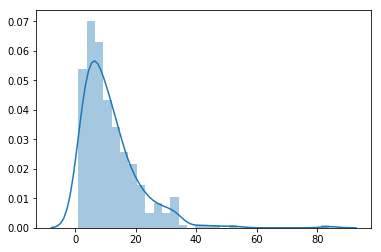

In [5]:
TfidfModel = gensim.models.TfidfModel
tfidf = TfidfModel(bow_corpus, dictionary)

x = []
weighted_vectors = []
for doc in bow_corpus:
    weighted_vectors.append(tfidf[doc])
    x.append(len(tfidf[doc]))
    
sns.distplot(x);

x = pandas.Series(x)
mean = int(math.floor(x.mean()))
x.describe()

In [8]:
for vector in weighted_vectors:
    vector.sort(key=lambda term: term[1], reverse=True)
     
weighted_vectors = [vector[:mean] for vector in weighted_vectors if len(vector) >= mean]

In [9]:
def cosin_sim(vector_a, vector_b):
    sigma_wi_wj = 0
    sigma_wi_square = 0
    sigma_wj_square = 0
    
    for i, wi in vector_a:
        for j, wj in vector_b:
            if sigma_wi_square == 0:
                sigma_wj_square += wj * wj
            if i == j:
                sigma_wi_wj += wi * wj
        sigma_wi_square += wi * wi
        
    return sigma_wi_wj / math.sqrt(sigma_wi_square * sigma_wj_square)

In [21]:
data = pandas.DataFrame()
data['vector_point'] = weighted_vectors
data['cluster'] = numpy.zeros(len(weighted_vectors), dtype='int')
data

,vector_point,cluster
0,"[(10, 0.4641231214416909), (8, 0.2804178974385...",0
1,"[(26, 0.3581550651106068), (33, 0.330037853104...",0
2,"[(36, 0.4217731821150599), (38, 0.344492520920...",0
3,"[(71, 0.4295164772192361), (72, 0.336564067793...",0
4,"[(87, 0.3303756425356845), (76, 0.313630855864...",0
5,"[(3, 0.3693750674088048), (22, 0.2863004529138...",0
6,"[(129, 0.3043650212404407), (116, 0.2804706339...",0
7,"[(140, 0.410031139105941), (141, 0.41003113910...",0
8,"[(148, 0.4179095311770157), (152, 0.3395336715...",0
9,"[(163, 0.3179116426317593), (165, 0.3179116426...",0


In [25]:
# def dbscan (points, eps, min_pts):
cluster_num = 0
for i in range(len(data)):
    if data.iloc[i]['cluster'] != 0:
        continue
   
    neighbors = []
    for j in range(len(data)):
        sim = cosin_sim(data.iloc[i]['vector_point'], data.iloc[j]['vector_points'])
        if i != j and sim >= eps:
            neighbors.append(j)
    
    if len(neighbors) < min_pts:
        data.iloc[i]['cluster'] = -1
        continue
    
    cluster_num += 1
    data.iloc[i]['cluster'] = cluster_num
    
    seed = neighbors
    for point in seed:
        if data.iloc[point]['cluster'] == -1:
            data.iloc[point]['cluster'] = cluster_num
        if data.iloc[point]['cluster'] != 0:
            continue
        data.iloc[point]['cluster'] = cluster_num
        
        neighbors = []
        for j in range(len(data)):
            sim = cosin_sim(data.iloc[i]['vector_point'], data.iloc[j]['vector_points'])
            if i != j and sim >= eps:
                neighbors.append(j)
        if len(neighbors) >= min_pts:
            seed.append(neighbors)
                
# DBSCAN(DB, distFunc, eps, minPts) {
#    C = 0                                                  /* Cluster counter */
#    for each point P in database DB {
#       if label(P) ≠ undefined then continue               /* Previously processed in inner loop */
#       Neighbors N = RangeQuery(DB, distFunc, P, eps)      /* Find neighbors */
#       if |N| < minPts then {                              /* Density check */
#          label(P) = Noise                                 /* Label as Noise */
#          continue
#       }
#       C = C + 1                                           /* next cluster label */
#       label(P) = C                                        /* Label initial point */
#       Seed set S = N \ {P}                                /* Neighbors to expand */
#       for each point Q in S {                             /* Process every seed point */
#          if label(Q) = Noise then label(Q) = C            /* Change Noise to border point */
#          if label(Q) ≠ undefined then continue            /* Previously processed */
#          label(Q) = C                                     /* Label neighbor */
#          Neighbors N = RangeQuery(DB, distFunc, Q, eps)   /* Find neighbors */
#          if |N| ≥ minPts then {                           /* Density check */
#             S = S ∪ N                                     /* Add new neighbors to seed set */
#          }
#       }
#    }
# }

KeyError: 'vector_points'